# Effects of temperature on COVID-19

##### By: Manushree Singhania, Alex Grinius, Lawrence Ma, Tanvi Singh


# Introduction
### About:
This dataset includes data about the number of COVID-19 cases in different schools and municipalities in Canada, from September 2021 to December 2021. It has 10 variables, most of which could be different factors for the possible fluctuations in the number of COVID-19 cases. 
### The research question we will work towards answering:
Does change in temperature (from September to December) affect the frequency of COVID-19 cases?
### What variables are we looking at to answer our research question?
Our primary explanatory variable is the `collected_date`, which we will manipulate to extract the month, as grouping this variable by month makes it easier to find the patterns and trends present. The `collected_date` variable includes data about when the sample with the SARS-Cov-2 virus was collected. As we do not have data about when the virus was caught, the closest date we have is when the virus sample was collected. 
Our response variable will be `total_confirmed_cases`, as we are interested in seeing how the number of COVID-19 cases changes as the months change. We are looking at this variable, since it includes the most substantial data, as it includes the confirmed cases of both students, staff and others at the school. 
### Describing our dataset:
The multivariate dataset with data about COVID-19 cases in different school districts/municipalities was sourced from the Government of Canada. The 10 variables are:
`collected_date` : The date when the sample with the SARS-CoV-2 virus was collected
`reported_date` : The date when the sample with the SARS-CoV-2 virus was reported
`school_board` : The name of the school board
`school_id` : The identification number unique to the school
`school` : The name of the school
`municipality` : The name of the municipality that the school is located in
`confirmed_student_cases` : The number of COVID-19 cases of students
`confirmed_staff_cases` : The number of COVID-19 cases of staff
`confirmed_unspecified_cases` : The number of COVID-19 cases of others present at the school
`total_confirmed_cases` : The sum of all COVID-19 cases reported
### Scientific papers used
We will be making use of research papers that outline the correlation between the change in season and the number/severity of COVID-19 cases to aid in our research about the change in temperature affecting the frequency of COVID-19 cases. These research papers use data collected in different regions than our data, so we will generalise these findings to our own dataset. 


# Preliminary Results
- Demonstrate that the dataset can be read from the web into R.
- Clean and wrangle your data into a tidy format.
- Plot the relevant raw data, tailoring your plot in a way that addresses your question.
- Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.


## Hypothesis:
- H0: mean_sep = mean_oct = mean_nov = mean_dec
- HA: mean_sep < mean_oct < mean_nov < mean_dec

In [2]:
#Loads all the necessary packages for the project. Run this cell before continuing.
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(grid)
library(gridExtra)
library(broom)
library(RCurl)
set.seed(13)


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete




In [4]:
#Reads the raw data from the given url
x <- getURL("https://raw.githubusercontent.com/Thespee/STAT201/master/schoolrecentcovid2021_2022.csv")
data <- read.csv(text = x)

head(data)

,collected_date,reported_date,school_board,school_id,school,municipality,confirmed_student_cases,confirmed_staff_cases,confirmed_unspecified_cases,total_confirmed_cases
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2021-09-13,2021-09-14,Avon Maitland District School Board,507725,Shakespeare Public School,Stratford,2,0,0,2
2,2021-09-13,2021-09-14,Bruce-Grey Catholic District School Board,732800,St Teresa of Calcutta Catholic School,Brockton,1,0,0,1
3,2021-09-13,2021-09-14,Catholic District School Board of Eastern Ontario,691127,J L Jordan Separate School,Brockville,0,1,0,1
4,2021-09-13,2021-09-14,Catholic District School Board of Eastern Ontario,758787,Sacred Heart of Jesus Separate School,Lanark Highlands,0,1,0,1
5,2021-09-13,2021-09-14,Catholic District School Board of Eastern Ontario,769312,St Andrew's Separate School,South Stormont,2,0,0,2
6,2021-09-13,2021-09-14,Catholic District School Board of Eastern Ontario,814555,St. Mark Catholic School,Prescott,1,0,0,1


In [5]:
# Tidying the data 
case_data <- data %>%
    mutate(date = as.Date(collected_date, format = "%Y-%m-%d")) %>%
    mutate(month = format(date, "%m")) %>% 
    select(month,total_confirmed_cases)
head(case_data)

,month,total_confirmed_cases
,<chr>,<int>
1,09,2
2,09,1
3,09,1
4,09,1
5,09,2
6,09,1


In [14]:
#unique(data$municipality)

#Side note, it would be interesting to examine how the latitude compares to the case levels, as generally, the higher the latitude the higher the case values are. 

In [6]:
# Average number of cases in each month
case_by_month <- case_data %>% 
    group_by(month) %>%
    summarize(mean = mean(total_confirmed_cases))
case_by_month

month,mean
<chr>,<dbl>
09,1.808039
10,1.950415
11,2.065245
12,2.393249


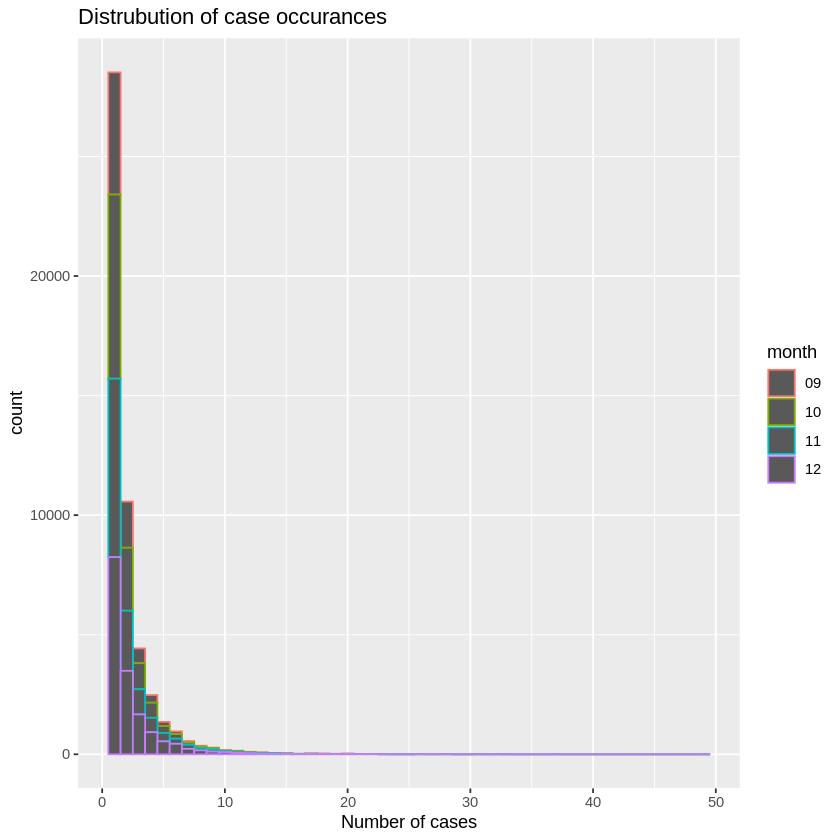

In [7]:
#visualizing the data
case_dist <- case_data %>%
    ggplot(aes(x = total_confirmed_cases, colour = month)) +
    geom_histogram(binwidth = 1) +
    xlab("Number of cases") +
    ggtitle("Distrubution of case occurances")
case_dist

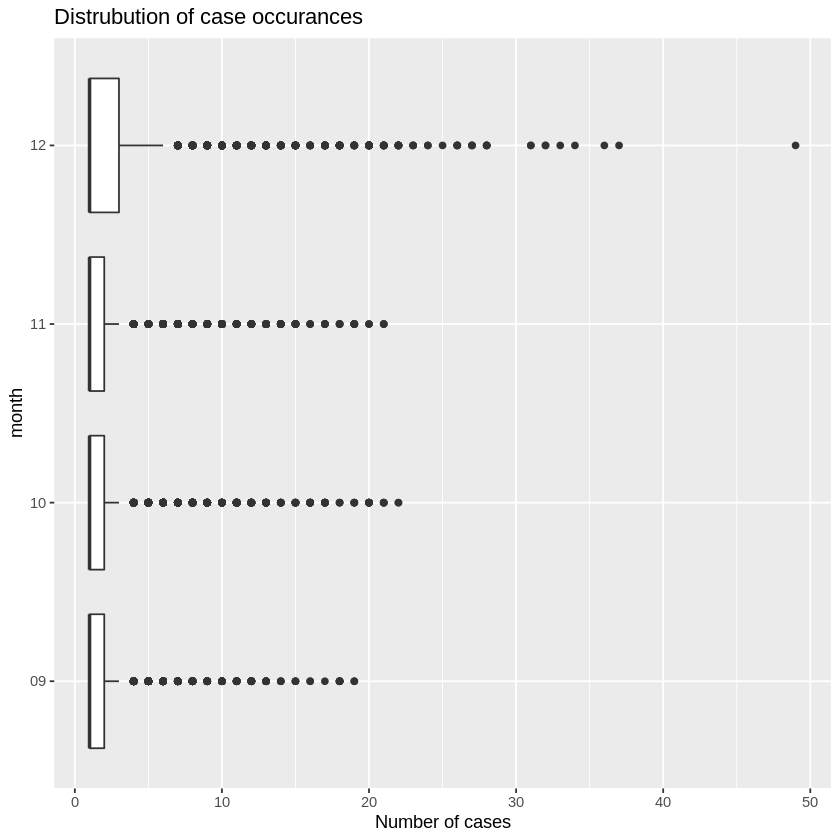

In [8]:
#visualizing the data
case_dist <- case_data %>%
    ggplot(aes(x = total_confirmed_cases, y = month)) +
    geom_boxplot() +
    xlab("Number of cases") +
    ggtitle("Distrubution of case occurances")
case_dist

In [9]:
#Testing the hypothesis
anova_results <- 
    aov(total_confirmed_cases ~ month, data = case_data) %>% 
    tidy()

# ANOVA F-test statistic
f_stat <- anova_results%>%
            filter(term=="month")%>%
            pull(statistic)

#p-value
anova_pval <- anova_results%>%
            filter(term=="month")%>%
            pull(p.value)

anova_results
f_stat
anova_pval

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
month,3,2416.632,805.543962,175.1758,5.445949e-113
Residuals,50295,231281.018,4.598489,NA,NA


[1] 175.1758

[1] 5.445949e-113

In [16]:
#Data for the months of September and December
case_for_Sep_Dec <- case_data %>% 
                    filter(month %in% c("09","12"))


#Testing the hypothesis for September and December
anova_for_two <- aov(total_confirmed_cases ~ month, data = case_data) %>% 
    tidy()


#p-value
anova_pval_for_two <- anova_results%>%
            filter(term=="month")%>%
            pull(p.value)

anova_pval_for_two
anova_for_two

[1] 5.445949e-113

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
month,3,2416.632,805.543962,175.1758,5.445949e-113
Residuals,50295,231281.018,4.598489,NA,NA


In [17]:
#Data for the months of October and November
case_for_Oct_Nov <- case_data %>% 
                    filter(month %in% c("10","11"))


#Testing the hypothesis for October and November
anova_for_Oct_Nov <- aov(total_confirmed_cases ~ month, data = case_data) %>% 
    tidy()


#p-value
anova_pval_for_Oct_Nov <- anova_results%>%
            filter(term=="month")%>%
            pull(p.value)

anova_pval_for_Oct_Nov
anova_for_Oct_Nov

[1] 5.445949e-113

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
month,3,2416.632,805.543962,175.1758,5.445949e-113
Residuals,50295,231281.018,4.598489,NA,NA


## Observations
- The mean by month does go up as the months get colder 
- The coloured graph shows that December has all the high case levels (25+)
- Most schools still had 1 or two cases even in the colder months
- Interestingly, Oct has more extreme case levels, but Nov still has a higher mean.

# Methods: Plan
What methods and plots will be used to examine the question (should include one hypothesis test and one CI)
Null hypothesis: There is no variation in the number of COVID-19 cases from September to December.
Alternative hypothesis: There is a statistically significant change in cases from September to December. 
### What do we expect to find?
As per previous research, it is found that the colder months of the year are the months in which the number of COVID-19 cases skyrocket, due to many secondary factors such as the variation in environmental variables and human behaviour, to name a few. We are expecting these findings to match our own results, by looking at the change frequency of COVID-19 cases from September to December. 
### What impact could such findings have?
If we reject our null hypothesis, these findings could urge policy makers and governments to call for extra precautions during the months in which the cases skyrocket, in order to ensure a healthy and safe population. This could also lead to other studies being held about the effect of temperature on other respiratory illnesses. These findings could also be generalised and applied to any potential epidemics/pandemics later on. 

### What future questions could this lead to?
This could lead to further research about other respiratory illnesses, or even other airborne illnesses/diseases. Additionally, the results of this study could also raise questions about the change in temperature in the rest of the seasons of the year (increase in temperature). 



# References
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7892320/
- https://bmcinfectdis.biomedcentral.com/articles/10.1186/s12879-021-06785-2
- https://www.annualreviews.org/doi/10.1146/annurev-virology-012420-022445
## Resources
- https://simplemaps.com/data/canada-cities.